In [49]:
import gdal
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
fp = '/Users/jacobamoul/Downloads/MOD14A1.A2019057.h08v04.006.2019084122023.hdf'
dataset = gdal.Open(fp, gdal.GA_ReadOnly)

In [5]:
subdata = g.GetSubDatasets()

In [6]:
for fname, name in subdata:
    print(name)
    print("\t" + fname)

[8x1200x1200] FireMask MODIS_Grid_Daily_Fire (8-bit unsigned integer)
	HDF4_EOS:EOS_GRID:"/Users/jacobamoul/Downloads/MOD14A1.A2019057.h08v04.006.2019084122023.hdf":MODIS_Grid_Daily_Fire:FireMask
[8x1200x1200] QA MODIS_Grid_Daily_Fire (8-bit unsigned integer)
	HDF4_EOS:EOS_GRID:"/Users/jacobamoul/Downloads/MOD14A1.A2019057.h08v04.006.2019084122023.hdf":MODIS_Grid_Daily_Fire:QA
[8x1200x1200] MaxFRP MODIS_Grid_Daily_Fire (32-bit integer)
	HDF4_EOS:EOS_GRID:"/Users/jacobamoul/Downloads/MOD14A1.A2019057.h08v04.006.2019084122023.hdf":MODIS_Grid_Daily_Fire:MaxFRP
[8x1200x1200] sample MODIS_Grid_Daily_Fire (16-bit unsigned integer)
	HDF4_EOS:EOS_GRID:"/Users/jacobamoul/Downloads/MOD14A1.A2019057.h08v04.006.2019084122023.hdf":MODIS_Grid_Daily_Fire:sample


In [2]:
band_ds = gdal.Open('HDF4_EOS:EOS_GRID:"/Users/jacobamoul/Downloads/MOD14A1.A2019057.h08v04.006.2019084122023.hdf":MODIS_Grid_Daily_Fire:FireMask', gdal.GA_ReadOnly)
band_array = band_ds.ReadAsArray().astype(np.int16)
band_path = '/Users/jacobamoul/Desktop/COGS118B/Project/test.tif'

0

In [93]:
out_ds = gdal.GetDriverByName('GTiff').Create(band_path,
                                                  band_ds.RasterXSize,
                                                  band_ds.RasterYSize,
                                                  8,  #Number of bands
                                                  gdal.GDT_Int16,
                                                  ['COMPRESS=PNG', 'TILED=YES'])
out_ds.SetGeoTransform(band_ds.GetGeoTransform())
out_ds.SetProjection(band_ds.GetProjection())
for i, img in enumerate(band_array, 1):
    out_ds.GetRasterBand(i).WriteArray(img)
out_ds = None

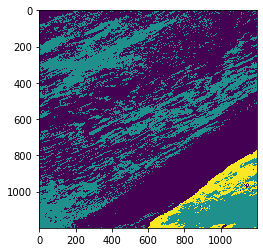

In [5]:
ds = gdal.Open(band_path, gdal.GA_ReadOnly)
plt.imshow(data[5])

In [97]:
gt

(-11119505.196667,
 926.6254330558345,
 0.0,
 5559752.598333,
 0.0,
 -926.6254330550003)

In [4]:
from osgeo import osr

data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

import cartopy.crs as ccrs


projcs = inproj.GetAttrValue("AUTHORITY", 1)
extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

In [28]:
clouds = data[4] == 4

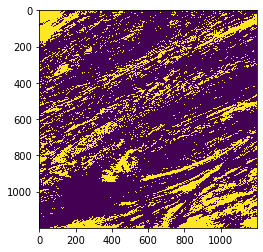

In [34]:
clouds = data[3] == 4
plt.imshow(data[3]*clouds, interpolation='nearest')

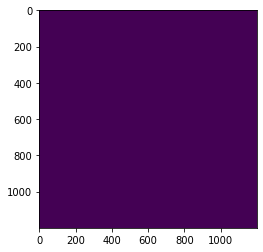

In [33]:
missing = data[4] == 0
plt.imshow(data[4]*missing, interpolation='nearest')

In [35]:
data.shape

(8, 1200, 1200)

In [9]:
fp = '/Users/jacobamoul/Downloads/MOD14A2.006_FireMask_doy2004201_aid0001.tif'

In [10]:
test = gdal.Open(fp, gdal.GA_ReadOnly)

In [26]:
dt = test.GetRasterBand(1).ReadAsArray()

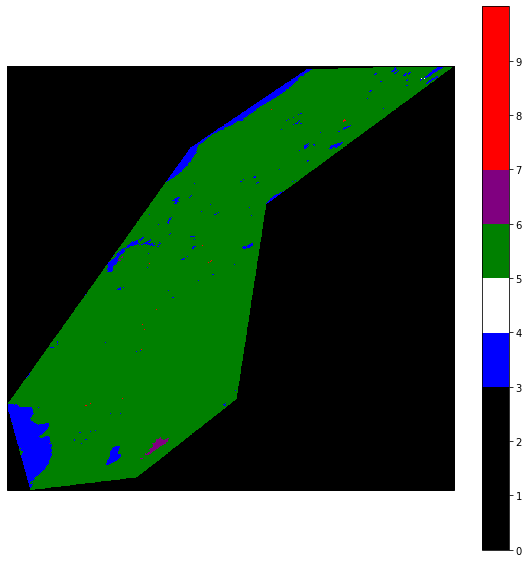

In [65]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection':ccrs.Sinusoidal()})
cmap = mpl.colors.ListedColormap(['black', 'blue', 'white', 'green', 'purple','red'])
bounds = [0,3,4,5,6,7,10]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
im = ax.imshow(dt, extent=extent, origin='upper', cmap=cmap, norm=norm)
fig.colorbar(im, spacing='proportional', ticks=np.arange(0,10))
# cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
#                                 norm=norm,
#                                 boundaries=bounds,
#                                 ticks=bounds,
#                                 spacing='proportional',
#                                 orientation='horizontal')

In [23]:
gt = test.GetGeoTransform()
proj = test.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)
extent = (gt[0], gt[0] + test.RasterXSize * gt[1],
          gt[3] + test.RasterYSize * gt[5], gt[3])

In [22]:
print(proj)

PROJCS["unnamed",GEOGCS["unnamed ellipse",DATUM["unknown",SPHEROID["unnamed",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]
